In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from glob import glob

In [3]:
fpath=glob('./crop_my_data/female/*.jpg')
mpath=glob('./crop_my_data/male/*.jpg')

In [18]:
df_female=pd.DataFrame(fpath,columns=['filepath'])
df_female['gender']='female'

df_male=pd.DataFrame(mpath,columns=['filepath'])
df_male['gender']='male'
df=pd.concat((df_female,df_male),axis=0)

In [19]:
df

,filepath,gender
0,./crop_my_data/female\female_0.jpg,female
1,./crop_my_data/female\female_1.jpg,female
2,./crop_my_data/female\female_100.jpg,female
3,./crop_my_data/female\female_1002.jpg,female
4,./crop_my_data/female\female_1005.jpg,female
...,...,...
2170,./crop_my_data/male\male_994.jpg,male
2171,./crop_my_data/male\male_996.jpg,male
2172,./crop_my_data/male\male_997.jpg,male
2173,./crop_my_data/male\male_998.jpg,male


In [20]:
df.shape

(4761, 2)

In [21]:
def get_size(path):
    img=cv2.imread(path)
    return img.shape[0]

In [22]:
df['dimension']=df['filepath'].apply(get_size)

In [23]:
df.tail()

,filepath,gender,dimension
2170,./crop_my_data/male\male_994.jpg,male,122
2171,./crop_my_data/male\male_996.jpg,male,54
2172,./crop_my_data/male\male_997.jpg,male,122
2173,./crop_my_data/male\male_998.jpg,male,81
2174,./crop_my_data/male\male_999.jpg,male,182


In [24]:
dist_gender=df['gender'].value_counts()
dist_gender

female    2586
male      2175
Name: gender, dtype: int64

<Axes: ylabel='gender'>

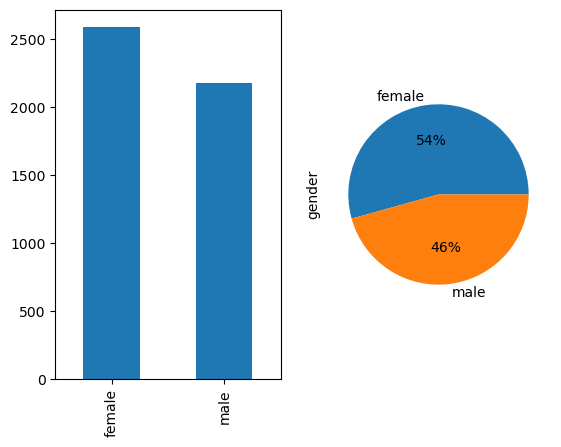

In [28]:
fig,ax=plt.subplots(nrows=1,ncols=2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
